# ECON408: Computational Methods in Macroeconomics

Markov Chains with Applications to Unemployment and Asset Pricing

Jesse Perla (University of British Columbia)

# Overview

## Motivation

-   Here we will introduce Markov Chains as a Markovian stochastic
    process over a discrete number of states
    -   These are useful in their own right, but are also a powerful
        tool if you discretize a continuous-state stochastic process
-   Using these, we will apply these to
    -   Introduce a simple model of unemployment and employment dynamics
    -   Risk-neutral asset pricing
-   In a future lecture these for more advanced asset-pricing examples
    including option-pricing and to explore risk-aversion

## Materials

-   Adapted from QuantEcon lectures coauthored with John Stachurski and
    Thomas J. Sargent
    -   [Finite Markov
        Chains](https://julia.quantecon.org/introduction_dynamics/finite_markov.html)
    -   [A Lake Model of Employment and
        Unemployment](https://julia.quantecon.org/multi_agent_models/lake_model.html)

In [1]:
using LinearAlgebra, Statistics, Distributions
using Plots.PlotMeasures, Plots, QuantEcon, Random
using StatsPlots, LaTeXStrings, NLsolve
default(;legendfontsize=16, linewidth=2, tickfontsize=12,
         bottom_margin=15mm)

# Markov Chains

## Discrete States

-   Consider a set of $N$ possible states of the world
-   **Markov chain**: a sequence of random variables $\{X_t\}$ on
    $\{x_1, \ldots, x_N\}$ with the [Markov
    property](https://en.wikipedia.org/wiki/Markov_property) $$
    \mathbb P ( X_{t+1} = x  \,|\, X_t )
    = \mathbb P ( X_{t+1}  = x \,|\, X_t, X_{t-1}, \ldots )
    $$
-   It will turn out that all Markov stochastic processes with a
    discrete number of states are Markov Chains and can be summarize by
    a **transition matrix**

See
[here](https://en.wikipedia.org/wiki/Continuous-time_Markov_chain#Definition)
for Continuous Time Markov Chains which replace the transition
probabilities with transition rates

## Transition Matrix

-   Summarize into a $P\in\mathbb{R}^{N\times N}$ **transition matrix**
    where $$
    P_{ij} \equiv \mathbb P ( X_{t+1} = x_j \,|\, X_t = x_i ),\quad \text{ for }i=1,\ldots N, j=1,\ldots N
    $$
-   Each row is a probability distribution for the next state ($j$)
    conditional on the current one ($i$)
    -   Hence $P_{ij}\geq 0$ and $\sum_{j=1}^N P_{ij} = 1$ for all $i$
-   The ordering of the matrix or states $x_1, \ldots x_N$ is arbitrary,
    but you need to be consistent!

## Example: Unemployed and Employed

<svg width="384" height="480" viewbox="0.00 0.00 98.66 132.80" xmlns="http://www.w3.org/2000/svg" xlink="http://www.w3.org/1999/xlink" style="; max-width: none; max-height: none">

<g id="graph0" class="graph" transform="scale(1 1) rotate(0) translate(4 128.8)">

<title>

G

</title>

<polygon fill="white" stroke="transparent" points="-4,4 -4,-128.8 94.66,-128.8 94.66,4 -4,4"></polygon>
<!-- E --> <g id="node1" class="node">

<title>

E

</title>

<ellipse fill="none" stroke="black" cx="27" cy="-106.8" rx="27" ry="18"></ellipse>
<text text-anchor="middle" x="27" y="-102.6" font-family="Times,serif" font-size="14.00">E</text>
</g> <!-- E&#45;&gt;E --> <g id="edge1" class="edge">

<title>

E-\>E

</title>

<path fill="none" stroke="black" d="M51.53,-114.92C62.51,-115.69 72,-112.99 72,-106.8 72,-102.64 67.72,-100.06 61.57,-99.04"></path>
<polygon fill="black" stroke="black" points="61.65,-95.54 51.53,-98.68 61.4,-102.54 61.65,-95.54"></polygon>
<text text-anchor="middle" x="81.33" y="-102.6" font-family="Times,serif" font-size="14.00">1-α</text>
</g> <!-- U --> <g id="node2" class="node">

<title>

U

</title>

<ellipse fill="none" stroke="black" cx="27" cy="-18" rx="27" ry="18"></ellipse>
<text text-anchor="middle" x="27" y="-13.8" font-family="Times,serif" font-size="14.00">U</text>
</g> <!-- E&#45;&gt;U --> <g id="edge3" class="edge">

<title>

E-\>U

</title>

<path fill="none" stroke="black" d="M20.11,-89.36C18.04,-83.59 16.03,-77.01 15,-70.8 13.77,-63.43 13.77,-61.37 15,-54 15.49,-51.09 16.18,-48.1 17,-45.14"></path>
<polygon fill="black" stroke="black" points="20.39,-46.03 20.11,-35.44 13.72,-43.9 20.39,-46.03"></polygon>
<text text-anchor="middle" x="18.5" y="-58.2" font-family="Times,serif" font-size="14.00">α</text>
</g> <!-- U&#45;&gt;E --> <g id="edge4" class="edge">

<title>

U-\>E

</title>

<path fill="none" stroke="black" d="M27,-36.11C27,-48.23 27,-64.74 27,-78.64"></path>
<polygon fill="black" stroke="black" points="23.5,-78.65 27,-88.65 30.5,-78.65 23.5,-78.65"></polygon>
<text text-anchor="middle" x="30.5" y="-58.2" font-family="Times,serif" font-size="14.00">λ</text>
</g> <!-- U&#45;&gt;U --> <g id="edge2" class="edge">

<title>

U-\>U

</title>

<path fill="none" stroke="black" d="M51.53,-26.12C62.51,-26.89 72,-24.19 72,-18 72,-13.84 67.72,-11.26 61.57,-10.24"></path>
<polygon fill="black" stroke="black" points="61.65,-6.74 51.53,-9.88 61.4,-13.74 61.65,-6.74"></polygon>
<text text-anchor="middle" x="81.33" y="-13.8" font-family="Times,serif" font-size="14.00">1-λ</text>
</g> </g>

</svg>

-   $\alpha$: probability of moving from employed to unemployed
-   $\lambda$: probability of moving from unemployed to employed
-   $\mathbb{P}(X_{t+1} = U \,|\, X_t = E) = \alpha$, etc.
-   Summarize as Transition Matrix $$
    P \equiv \begin{bmatrix} 1-\alpha & \alpha\\ \lambda & 1-\lambda \end{bmatrix}
    $$

## Example: Recessions Transitions

<svg width="384" height="480" viewbox="0.00 0.00 167.50 221.60" xmlns="http://www.w3.org/2000/svg" xlink="http://www.w3.org/1999/xlink" style="; max-width: none; max-height: none">

<g id="graph0" class="graph" transform="scale(1 1) rotate(0) translate(4 217.6)">

<title>

G

</title>

<polygon fill="white" stroke="transparent" points="-4,4 -4,-217.6 163.5,-217.6 163.5,4 -4,4"></polygon>
<!-- N --> <g id="node1" class="node">

<title>

N

</title>

<ellipse fill="none" stroke="black" cx="82" cy="-195.6" rx="27" ry="18"></ellipse>
<text text-anchor="middle" x="82" y="-191.4" font-family="Times,serif" font-size="14.00">N</text>
</g> <!-- N&#45;&gt;N --> <g id="edge1" class="edge">

<title>

N-\>N

</title>

<path fill="none" stroke="black" d="M106.53,-203.72C117.51,-204.49 127,-201.79 127,-195.6 127,-191.44 122.72,-188.86 116.57,-187.84"></path>
<polygon fill="black" stroke="black" points="116.65,-184.34 106.53,-187.48 116.4,-191.34 116.65,-184.34"></polygon>
<text text-anchor="middle" x="142.75" y="-191.4" font-family="Times,serif" font-size="14.00">0.971</text>
</g> <!-- M --> <g id="node2" class="node">

<title>

M

</title>

<ellipse fill="none" stroke="black" cx="27" cy="-106.8" rx="27" ry="18"></ellipse>
<text text-anchor="middle" x="27" y="-102.6" font-family="Times,serif" font-size="14.00">M</text>
</g> <!-- N&#45;&gt;M --> <g id="edge2" class="edge">

<title>

N-\>M

</title>

<path fill="none" stroke="black" d="M59.08,-185.72C47.78,-180.06 35.17,-171.51 28.5,-159.6 24.36,-152.2 23.06,-143.23 23.08,-134.85"></path>
<polygon fill="black" stroke="black" points="26.58,-134.9 23.69,-124.71 19.6,-134.49 26.58,-134.9"></polygon>
<text text-anchor="middle" x="44.75" y="-147" font-family="Times,serif" font-size="14.00">0.029</text>
</g> <!-- M&#45;&gt;N --> <g id="edge3" class="edge">

<title>

M-\>N

</title>

<path fill="none" stroke="black" d="M42.39,-121.8C48.42,-127.84 55.07,-135.25 60,-142.8 65.07,-150.56 69.4,-159.68 72.85,-168.09"></path>
<polygon fill="black" stroke="black" points="69.62,-169.44 76.48,-177.51 76.15,-166.92 69.62,-169.44"></polygon>
<text text-anchor="middle" x="84.75" y="-147" font-family="Times,serif" font-size="14.00">0.145</text>
</g> <!-- M&#45;&gt;M --> <g id="edge4" class="edge">

<title>

M-\>M

</title>

<path fill="none" stroke="black" d="M51.53,-114.92C62.51,-115.69 72,-112.99 72,-106.8 72,-102.64 67.72,-100.06 61.57,-99.04"></path>
<polygon fill="black" stroke="black" points="61.65,-95.54 51.53,-98.68 61.4,-102.54 61.65,-95.54"></polygon>
<text text-anchor="middle" x="87.75" y="-102.6" font-family="Times,serif" font-size="14.00">0.778</text>
</g> <!-- S --> <g id="node3" class="node">

<title>

S

</title>

<ellipse fill="none" stroke="black" cx="83" cy="-18" rx="27" ry="18"></ellipse>
<text text-anchor="middle" x="83" y="-13.8" font-family="Times,serif" font-size="14.00">S</text>
</g> <!-- M&#45;&gt;S --> <g id="edge5" class="edge">

<title>

M-\>S

</title>

<path fill="none" stroke="black" d="M37.27,-89.88C45.64,-76.91 57.59,-58.38 67.18,-43.52"></path>
<polygon fill="black" stroke="black" points="70.31,-45.12 72.79,-34.82 64.43,-41.33 70.31,-45.12"></polygon>
<text text-anchor="middle" x="76.75" y="-58.2" font-family="Times,serif" font-size="14.00">0.077</text>
</g> <!-- S&#45;&gt;N --> <g id="edge7" class="edge">

<title>

S-\>N

</title>

<path fill="none" stroke="black" d="M91.82,-35.06C98.86,-48.85 108.15,-69.5 112,-88.8 118.19,-119.86 116.14,-130.35 104,-159.6 102.46,-163.3 100.55,-167.05 98.5,-170.65"></path>
<polygon fill="black" stroke="black" points="95.51,-168.83 93.26,-179.18 101.48,-172.49 95.51,-168.83"></polygon>
<text text-anchor="middle" x="131.75" y="-102.6" font-family="Times,serif" font-size="14.00">0.508</text>
</g> <!-- S&#45;&gt;S --> <g id="edge6" class="edge">

<title>

S-\>S

</title>

<path fill="none" stroke="black" d="M107.53,-26.12C118.51,-26.89 128,-24.19 128,-18 128,-13.84 123.72,-11.26 117.57,-10.24"></path>
<polygon fill="black" stroke="black" points="117.65,-6.74 107.53,-9.88 117.4,-13.74 117.65,-6.74"></polygon>
<text text-anchor="middle" x="143.75" y="-13.8" font-family="Times,serif" font-size="14.00">0.492</text>
</g> </g>

</svg>

-   States (ordered consistently):
    -   $N$: Normal Growth, $M$: Mild Recession, $S$: Severe Recession
-   Transitions empirically estimated in [Hamilton
    2005](https://julia.quantecon.org/zreferences.html#id84) $$
    P \equiv \begin{bmatrix}
       0.971 & 0.029 & 0 \\
       0.145 & 0.778 & 0.077 \\
       0 & 0.508 & 0.492
    \end{bmatrix}
    $$

## Discrete RVs

In [2]:
probs = [0.6, 0.4]
@show sum(probs) ≈ 1
d = Categorical(probs)
@show d
draws = rand(d, 4)
@show draws
# Assign associated with indices
G = [5, 20]
# access by index
@show G[draws];

sum(probs) ≈ 1 = true
d = Categorical{Float64, Vector{Float64}}(support=Base.OneTo(2), p=[0.6, 0.4])
draws = [2, 1, 2, 1]
G[draws] = [20, 5, 20, 5]

## Simulating Markov Chains

``` julia
function simulate_markov_chain(P, X_0, T)
    N = size(P, 1)
    num_chains = length(X_0)
    P_dist = [Categorical(P[i, :])
              for i in 1:N]
    X = zeros(Int, num_chains, T+1)
    X[:, 1] .= X_0
    for t in 1:T
        for n in 1:num_chains
            X[n, t+1] = rand(P_dist[X[n, t]])
        end
    end
    return X
end
```

-   Create `Categorical` per row
-   One chain for each `X_0`
-   Simulate for each chain by:
    -   Save current index
    -   Use index to choose row
    -   Draw the new index according to that distribution

## Simulating Unemployment and Employment


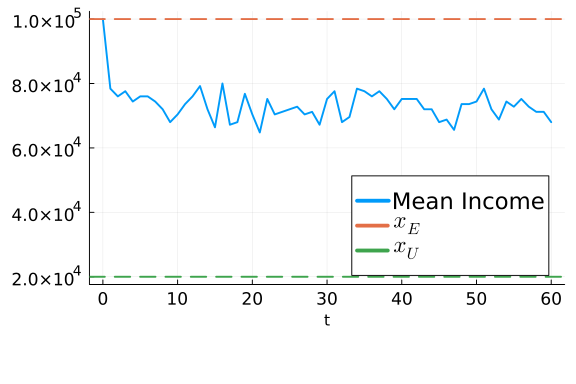

In [4]:
alpha, lambda = 0.3, 0.6
P = [1-alpha alpha; lambda 1-lambda]
G = [100000.00, 20000.00]
X_0 = ones(Int, 100)  # 100 people employed
T = 60
X = simulate_markov_chain(P, X_0, T)
X_values = G[X]  # just indexes by the X
X_mean = mean(X_values;dims=1)
plot(0:T, X_mean', xlabel="t",
     legend=:bottomright, label="Mean Income",
     size=(600, 400))
hline!([G[1]]; label=L"x_E", linestyle=:dash)
hline!([G[2]]; label=L"x_U", linestyle=:dash)

## Distribution of Future Wages


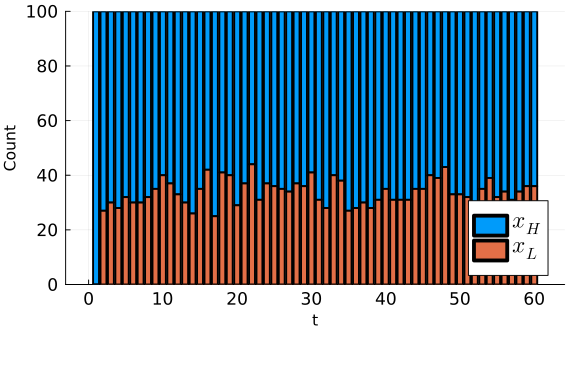

In [5]:
unique_values = unique(X_values)
counts = [sum(X_values[:, t] .== val) for
          val in unique_values, t in 1:T]
# Create the stacked bar chart
groupedbar(1:T, counts';
           bar_position = :stack,
           xlabel="t", ylabel="Count",
           label = [L"x_H" L"x_L"],
           size=(600, 400))

## Simulating with QuantEcon packages

In [6]:
alpha, lambda = 0.3, 0.6
P = [1-alpha alpha; lambda 1-lambda]
mc = MarkovChain(P)
T = 1000
init=1 # initial condition
# using QuantEcon.jl
X = simulate(mc, T;init)
prop_E = sum(X .== 1)/length(X)
println("Prop in E = $prop_E");

Prop in E = 0.686

# Transitions and Expectations

## Probability Mass Functions (PMF)

-   Let the PMF of $X_t$ be given by a row vector $$
    \pi_t \equiv \begin{bmatrix}\mathbb{P}(X_t = x_1) &\ldots & \mathbb{P}(X_t = x_N)\end{bmatrix}
    $$
    -   $\pi_{ti}\geq 0$ for all $i=1,\ldots N$ and
        $\sum_{i=1}^N \pi_{ti} = 1$
    -   Using $\pi_t$ a row vector for convenience
-   If the initial state is known at $t=0$ then $\pi_0$ might be
    degenerate
    -   e.g., if $\mathbb{P}(X_0 = E) = 1$ then
        $\pi_0 = \begin{bmatrix}1 & 0\end{bmatrix}$

## Conditional Forecasts

-   Many macro questions involve:
    $\mathbb{P}(X_{t+j} = x_i | X_t = x_j)$ etc.

-   The transition matrix makes it very easy to forecast the evolution
    of the distribution. Without proof, given $\pi_t$ initial condition

    $$
    \begin{bmatrix}\mathbb{P}(X_{t+1} = x_1) &\ldots & \mathbb{P}(X_{t+1} = x_N)\end{bmatrix} \equiv \pi_{t+1} = \pi_t P
    $$

-   Inductively: for the matrix power (i.e. $P \times P\times \ldots P$,
    not pointwise)

    $$
    \begin{bmatrix}\mathbb{P}(X_{t+j} = x_1) &\ldots & \mathbb{P}(X_{t+j} = x_N)\end{bmatrix} \equiv \pi_{t+j} = \pi_t P^j
    $$

## Conditional Expectations

-   Given the conditional probabilities, expectations are easy

-   Now assign $X_t$ as a random variable with values $x_1, \ldots x_N$
    and pmf $\pi_t$

-   Define $G \equiv \begin{bmatrix}x_1 & \ldots & x_N\end{bmatrix}$

-   From definition of conditional expectations, where $X_t\sim \mu_t$

    $$
    \mathbb{E}[X_{t+j} \,|\, X_t] = \sum_{i=1}^N x_i \pi_{t+j,i} = G \cdot (\pi_t  P^j) = G (\pi_t  P^j)^{\top}
    $$

-   This works for **enormous** numbers of states $N$, as long as $P$ is
    sparse (i.e., the number of elements of $P$ is significant)

## Example: Expected Income

-   Define incomes in E and U states as
    -   $G \equiv \begin{bmatrix}100,000 & 20,000\end{bmatrix}$
    -   Maintain $\mathbb{P}(X_0 = E) = 1$, or
        $\pi_0 = \begin{bmatrix} 1 & 0 \end{bmatrix}$
-   Expected income in 20 periods is then

$$
  \mathbb{E}[X_{20} \,|\, X_0 = x_E] = G \cdot (\pi_0  P^{20})
  $$

## Reminder: PDV for Linear State Space Models

-   If $x_{t+1} = A x_t + C w_{t+1}$ and $y_t = G x_t$ then, $$
    \begin{aligned}
    p(x_t) &= \mathbb{E}\left[\sum_{j=0}^{\infty} \beta^j y_{t+j} \big| x_t\right]\\
    &= G (I - \beta A)^{-1} x_t
    \end{aligned}
    $$
-   Relabel Markov Chains to match the algebra:
    $x \equiv \pi^{\top}, A \equiv P^{\top}, C=0$

## Expected Present Discounted Value

-   Consider an asset with period payoffs in $x_1,\ldots x_N$ with
    transitions according to $P$
-   Risk-neutral **expected present discounted value(EPDV)** $$
    \begin{aligned}
    p(X_t) &= \mathbb{E}\left[\sum_{j=0}^N \beta^j X_{t+j}\,\big|\,X_t\right]\\
    &= \sum_{j=0}^N \beta^j \underbrace{\mathbb{E}\left[X_{t+j}\,\big|\,X_t\right]}_{ =G\left(\pi_t P^j\right)^{\top}}\\
    &= G(I - \beta P^{\top})^{-1} \pi_t^{\top}
    \end{aligned}
    $$
    -   Note the connection to the LSS

# Stationarity and Ergodicity

## Stationary Distribution

-   Take some $X_t$ initial condition, does this converge?

    $$
    \lim_{j\to\infty} X_{t+j}\,|\,X_t = \lim_{j\to\infty} \pi_t \cdot P^j = \pi_{\infty}?
    $$

    -   Does it exist? Is it unique?

-   How does it compare to fixed point below, i.e. does
    $\pi^{*} = \pi_{\infty}$ for all $X_t$?

    $$
    \pi^{*} = \pi^{*} \cdot P
    $$

    -   This is the eigenvector associated with the eigenvalue of $1$ of
        $P^{\top}$
    -   Can prove there is always at least one. If more than one,
        multiplicity

## Stochastic Matrices

-   $P$ is a [stochastic
    matrix](https://en.wikipedia.org/wiki/Stochastic_matrix) if
    -   $\sum_{j=1}^N P_{ij} = 1$ for all $i$, e.g. rows are conditional
        distributions
-   **Key Properties:**
    -   One (or more) eigenvalue of $1$ with associated left-eigenvector
        $\pi$ $$
        \pi P = \pi
        $$
    -   Equivalently the right eigenvector with eigenvalue $=1$ $$
        P^{\top}\pi^{\top} = 1 \times \pi^{\top}
        $$
    -   Where we can normalize to $\sum_{n=1}^N \pi_i = 1$

## Calculating Stationary Distributions

-   Compare the steady states
    -   Left-eigenvector: $\pi^{*} = \pi^{*} P$ (calculate with
        right-eigenvector $1\times \pi^{*\top} = P^{\top}\pi^{*\top}$)
    -   Limiting distribution: $\lim_{T\to\infty}\pi_0 P^T$
-   Can show that the stationary distribution is
    $\pi^{*} = \begin{bmatrix}\frac{\lambda}{\alpha+\lambda} & \frac{\alpha}{\alpha+\lambda}\end{bmatrix}$

In [7]:
eigvals, eigvecs = eigen(P')
index = findfirst(x -> isapprox(x, 1), eigvals)
pi_star = real.(vec(eigvecs[:, index]))
pi_star = pi_star / sum(pi_star)
pi_0 = [1.0, 0.0]
pi_inf = pi_0' * (P^100) # \approx infty?
println("pi_star = ", pi_star)
println("pi_inf = ", pi_inf);

pi_star = [0.6666666666666666, 0.3333333333333333]
pi_inf = [0.6666666666666629 0.33333333333333154]

## Communicating States

-   Consider two states $X_i$ and $X_j$ ordered by indices $i$ and $j$
    in $P$,

-   If it is possible to move from $X_i$ to $X_j$ in a finite number of
    steps, the states are said to **communicate**

-   Formally, $X_i$ and $Y_j$ communicate if there exist $l$ and $m$
    such that

    $$
    P^l_{ij} > 0 \quad \text{and} \quad P^m_{ji} > 0
    $$

    -   Consider transition probabilities to see why this implies
        communication

## Irreducibility

-   A Markov chain is **irreducible** if all states communicate with
    each other
-   Calculated in practice with tools such as [strongly connected
    components](https://en.wikipedia.org/wiki/Strongly_connected_component)
    from Graph Theory

In [8]:
mc = MarkovChain(P)
@show is_irreducible(mc);

is_irreducible(mc) = true

## Example: Not-Irreducible

<svg width="384" height="480" viewbox="0.00 0.00 204.50 221.60" xmlns="http://www.w3.org/2000/svg" xlink="http://www.w3.org/1999/xlink" style="; max-width: none; max-height: none">

<g id="graph0" class="graph" transform="scale(1 1) rotate(0) translate(4 217.6)">

<title>

G

</title>

<polygon fill="white" stroke="transparent" points="-4,4 -4,-217.6 200.5,-217.6 200.5,4 -4,4"></polygon>
<!-- A --> <g id="node1" class="node">

<title>

A

</title>

<ellipse fill="none" stroke="black" cx="68" cy="-195.6" rx="27" ry="18"></ellipse>
<text text-anchor="middle" x="68" y="-191.4" font-family="Times,serif" font-size="14.00">A</text>
</g> <!-- A&#45;&gt;A --> <g id="edge1" class="edge">

<title>

A-\>A

</title>

<path fill="none" stroke="black" d="M92.53,-203.72C103.51,-204.49 113,-201.79 113,-195.6 113,-191.44 108.72,-188.86 102.57,-187.84"></path>
<polygon fill="black" stroke="black" points="102.65,-184.34 92.53,-187.48 102.4,-191.34 102.65,-184.34"></polygon>
<text text-anchor="middle" x="121.75" y="-191.4" font-family="Times,serif" font-size="14.00">0.4</text>
</g> <!-- B --> <g id="node2" class="node">

<title>

B

</title>

<ellipse fill="none" stroke="black" cx="27" cy="-106.8" rx="27" ry="18"></ellipse>
<text text-anchor="middle" x="27" y="-102.6" font-family="Times,serif" font-size="14.00">B</text>
</g> <!-- A&#45;&gt;B --> <g id="edge2" class="edge">

<title>

A-\>B

</title>

<path fill="none" stroke="black" d="M48.69,-182.66C40.95,-176.76 32.85,-168.9 28.5,-159.6 25,-152.12 23.82,-143.34 23.74,-135.17"></path>
<polygon fill="black" stroke="black" points="27.25,-135.05 24.17,-124.91 20.26,-134.76 27.25,-135.05"></polygon>
<text text-anchor="middle" x="37.75" y="-147" font-family="Times,serif" font-size="14.00">0.4</text>
</g> <!-- C --> <g id="node3" class="node">

<title>

C

</title>

<ellipse fill="none" stroke="black" cx="134" cy="-106.8" rx="27" ry="18"></ellipse>
<text text-anchor="middle" x="134" y="-102.6" font-family="Times,serif" font-size="14.00">C</text>
</g> <!-- A&#45;&gt;C --> <g id="edge3" class="edge">

<title>

A-\>C

</title>

<path fill="none" stroke="black" d="M79.8,-179.08C89.84,-165.87 104.43,-146.69 115.94,-131.55"></path>
<polygon fill="black" stroke="black" points="119.04,-133.26 122.3,-123.18 113.46,-129.03 119.04,-133.26"></polygon>
<text text-anchor="middle" x="115.75" y="-147" font-family="Times,serif" font-size="14.00">0.2</text>
</g> <!-- B&#45;&gt;A --> <g id="edge5" class="edge">

<title>

B-\>A

</title>

<path fill="none" stroke="black" d="M36.22,-124.01C39.44,-129.87 43,-136.57 46,-142.8 50.03,-151.15 54.09,-160.42 57.61,-168.79"></path>
<polygon fill="black" stroke="black" points="54.4,-170.19 61.46,-178.09 60.87,-167.51 54.4,-170.19"></polygon>
<text text-anchor="middle" x="62.75" y="-147" font-family="Times,serif" font-size="14.00">0.6</text>
</g> <!-- B&#45;&gt;B --> <g id="edge4" class="edge">

<title>

B-\>B

</title>

<path fill="none" stroke="black" d="M51.53,-114.92C62.51,-115.69 72,-112.99 72,-106.8 72,-102.64 67.72,-100.06 61.57,-99.04"></path>
<polygon fill="black" stroke="black" points="61.65,-95.54 51.53,-98.68 61.4,-102.54 61.65,-95.54"></polygon>
<text text-anchor="middle" x="80.75" y="-102.6" font-family="Times,serif" font-size="14.00">0.4</text>
</g> <!-- C&#45;&gt;C --> <g id="edge6" class="edge">

<title>

C-\>C

</title>

<path fill="none" stroke="black" d="M158.53,-114.92C169.51,-115.69 179,-112.99 179,-106.8 179,-102.64 174.72,-100.06 168.57,-99.04"></path>
<polygon fill="black" stroke="black" points="168.65,-95.54 158.53,-98.68 168.4,-102.54 168.65,-95.54"></polygon>
<text text-anchor="middle" x="187.75" y="-102.6" font-family="Times,serif" font-size="14.00">0.4</text>
</g> <!-- D --> <g id="node4" class="node">

<title>

D

</title>

<ellipse fill="none" stroke="black" cx="133" cy="-18" rx="27" ry="18"></ellipse>
<text text-anchor="middle" x="133" y="-13.8" font-family="Times,serif" font-size="14.00">D</text>
</g> <!-- C&#45;&gt;D --> <g id="edge7" class="edge">

<title>

C-\>D

</title>

<path fill="none" stroke="black" d="M123.05,-90.15C119.61,-84.35 116.25,-77.53 114.5,-70.8 112.16,-61.8 114.28,-52.16 117.8,-43.66"></path>
<polygon fill="black" stroke="black" points="120.96,-45.16 122.21,-34.64 114.67,-42.09 120.96,-45.16"></polygon>
<text text-anchor="middle" x="123.75" y="-58.2" font-family="Times,serif" font-size="14.00">0.6</text>
</g> <!-- D&#45;&gt;C --> <g id="edge9" class="edge">

<title>

D-\>C

</title>

<path fill="none" stroke="black" d="M133.2,-36.11C133.34,-48.23 133.53,-64.74 133.69,-78.64"></path>
<polygon fill="black" stroke="black" points="130.19,-78.69 133.8,-88.65 137.19,-78.61 130.19,-78.69"></polygon>
<text text-anchor="middle" x="142.75" y="-58.2" font-family="Times,serif" font-size="14.00">0.6</text>
</g> <!-- D&#45;&gt;D --> <g id="edge8" class="edge">

<title>

D-\>D

</title>

<path fill="none" stroke="black" d="M157.53,-26.12C168.51,-26.89 178,-24.19 178,-18 178,-13.84 173.72,-11.26 167.57,-10.24"></path>
<polygon fill="black" stroke="black" points="167.65,-6.74 157.53,-9.88 167.4,-13.74 167.65,-6.74"></polygon>
<text text-anchor="middle" x="186.75" y="-13.8" font-family="Times,serif" font-size="14.00">0.4</text>
</g> </g>

</svg>

``` julia
P2 = [0.4 0.4 0.2 0.0;
     0.6 0.4 0.0 0.0;
     0.0 0.0 0.4 0.6;
     0.0 0.0 0.6 0.4]
mc2 = MarkovChain(P2)
@show is_irreducible(mc2);
```

    is_irreducible(mc2) = false

## Periodicity

-   Loosely speaking, a Markov chain is called periodic if it cycles in
    a predictable way, and aperiodic otherwise
-   See
    [here](https://en.wikipedia.org/wiki/Discrete-time_Markov_chain#Periodicity)
    for more details
    -   The “period” is the greatest common divisor of the set of times
        at which the chain can return to a state

In [10]:
mc = MarkovChain(P)
@show is_aperiodic(mc);

is_aperiodic(mc) = true

## Example: Aperiodic

<svg width="384" height="480" viewbox="0.00 0.00 97.50 221.60" xmlns="http://www.w3.org/2000/svg" xlink="http://www.w3.org/1999/xlink" style="; max-width: none; max-height: none">

<g id="graph0" class="graph" transform="scale(1 1) rotate(0) translate(4 217.6)">

<title>

G

</title>

<polygon fill="white" stroke="transparent" points="-4,4 -4,-217.6 93.5,-217.6 93.5,4 -4,4"></polygon>
<!-- A --> <g id="node1" class="node">

<title>

A

</title>

<ellipse fill="none" stroke="black" cx="58" cy="-195.6" rx="27" ry="18"></ellipse>
<text text-anchor="middle" x="58" y="-191.4" font-family="Times,serif" font-size="14.00">A</text>
</g> <!-- B --> <g id="node2" class="node">

<title>

B

</title>

<ellipse fill="none" stroke="black" cx="27" cy="-106.8" rx="27" ry="18"></ellipse>
<text text-anchor="middle" x="27" y="-102.6" font-family="Times,serif" font-size="14.00">B</text>
</g> <!-- A&#45;&gt;B --> <g id="edge1" class="edge">

<title>

A-\>B

</title>

<path fill="none" stroke="black" d="M52.02,-177.86C47.61,-165.5 41.5,-148.41 36.43,-134.21"></path>
<polygon fill="black" stroke="black" points="39.62,-132.72 32.96,-124.48 33.03,-135.08 39.62,-132.72"></polygon>
<text text-anchor="middle" x="54.75" y="-147" font-family="Times,serif" font-size="14.00">1.0</text>
</g> <!-- C --> <g id="node3" class="node">

<title>

C

</title>

<ellipse fill="none" stroke="black" cx="58" cy="-18" rx="27" ry="18"></ellipse>
<text text-anchor="middle" x="58" y="-13.8" font-family="Times,serif" font-size="14.00">C</text>
</g> <!-- B&#45;&gt;C --> <g id="edge2" class="edge">

<title>

B-\>C

</title>

<path fill="none" stroke="black" d="M32.98,-89.06C37.39,-76.7 43.5,-59.61 48.57,-45.41"></path>
<polygon fill="black" stroke="black" points="51.97,-46.28 52.04,-35.68 45.38,-43.92 51.97,-46.28"></polygon>
<text text-anchor="middle" x="54.75" y="-58.2" font-family="Times,serif" font-size="14.00">1.0</text>
</g> <!-- C&#45;&gt;A --> <g id="edge3" class="edge">

<title>

C-\>A

</title>

<path fill="none" stroke="black" d="M63.27,-35.92C64.79,-41.61 66.24,-48.02 67,-54 72.89,-100.56 72.89,-113.04 67,-159.6 66.66,-162.31 66.17,-165.11 65.6,-167.89"></path>
<polygon fill="black" stroke="black" points="62.18,-167.14 63.27,-177.68 68.99,-168.76 62.18,-167.14"></polygon>
<text text-anchor="middle" x="80.75" y="-102.6" font-family="Times,serif" font-size="14.00">1.0</text>
</g> </g>

</svg>

``` julia
P3 = [0 1 0; 0 0 1; 1 0 0]
mc3 = MarkovChain(P3)
@show is_aperiodic(mc3);
```

    is_aperiodic(mc3) = false

## Theorems for Stationarity

-   **Theorem** Every stochastic matrix $P$ has at least one stationary
    distribution.
-   **Theorem** If $P$ is irreducible and aperiodic then
    -   it has a unique stationary distribution $\pi^{*}$
    -   for any initial distribution $\pi_0$,
        $\lim_{T\to\infty}\pi_0 P^T = \pi^{*}$
    -   $P_{ij} > 0$ for all $i,j$ is a sufficient condition
    -   it is **ergodic**. With $\mathbb{1}\{\cdot\}$ the indicator
        function $$
        \lim_{T\to\infty} \frac{1}{T} \sum_{t=1}^T \mathbb{1}\{X_t = x_i\} = \pi^{*}_i, \quad \text{for all }i
        $$

## Ergodicity

-   These is the same sense of **ergodicity** we discussed
    [before](https://jlperla.github.io/ECON408/lectures/stochastic_dynamics.html#/ergodicity)


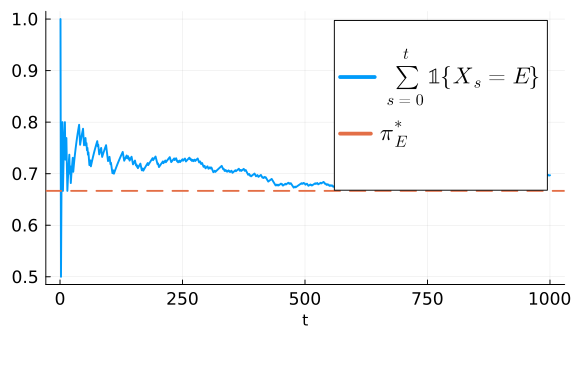

In [12]:
alpha, lambda = 0.3, 0.6
P = [1-alpha alpha; lambda 1-lambda]
mc = MarkovChain(P)
pi_star = stationary_distributions(mc)[1]
T = 1000
init=1
X = simulate(mc, T;init)
prop_E_t = cumsum(X.==1)./(1:length(X))
plot(1:T, prop_E_t, xlabel="t",
 label=L"\sum_{s=0}^t \mathbb{1}\{X_s = E\}",
 size=(600, 400))
hline!([pi_star[1]]; label=L"\pi^{*}_E",
linestyle=:dash)     

# Discretizing Continuous State Processes

## Discretization

-   Unless continuous variables are easily summarized by a finite number
    of parameters or statistics, we will need to convert continuous
    functions and stochastic processes into discrete ones.
-   Hence, to implement many algorithms, it is useful to model decisions
    with a finite number of states
    -   If the natural stochastic process is discrete, then no problem
    -   Otherwise, you can **discretize** the continuous time process
        into $N$ states
    -   Try to ensure crucial statistics are preserved
    -   $N$ might be very large!

## AR(1) Transition Probabilities

e.g. $X_{t+1} = \rho X_t + \sigma w_{t+1}$ using [Tauchen’s
Method](https://julia.quantecon.org/introduction_dynamics/finite_markov.html#exercise-3)


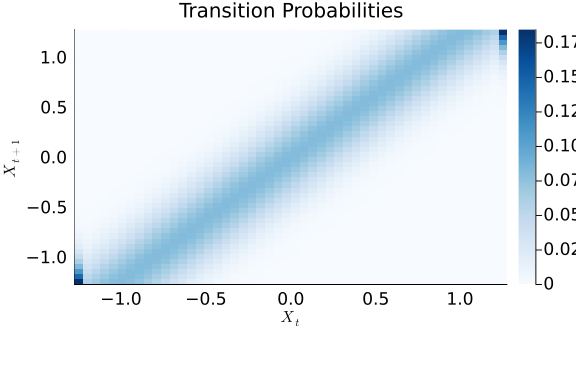

In [13]:
N = 50 # number of nodes
rho = 0.8
sigma = 0.25
mc = tauchen(N, rho, sigma)
X_vals = mc.state_values
heatmap(X_vals, X_vals, mc.p;
        xlabel=L"X_t",
        ylabel=L"X_{t+1}",
        title="Transition Probabilities",
        color=:Blues,
        size=(600, 400))

## Simulation


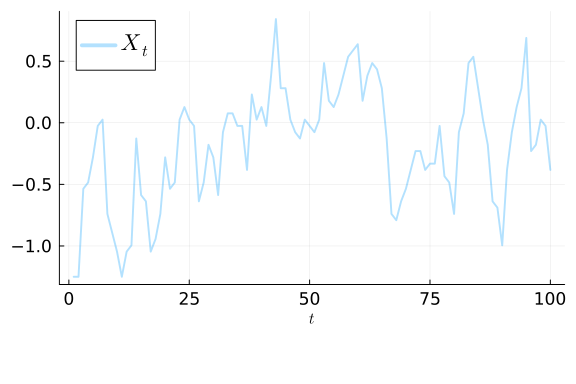

In [14]:
T = 100
X = simulate(mc, T;init=1)
plot(X, xlabel=L"t", label=L"X_t",
     alpha = 0.3, size=(600, 400))

## Ensemble


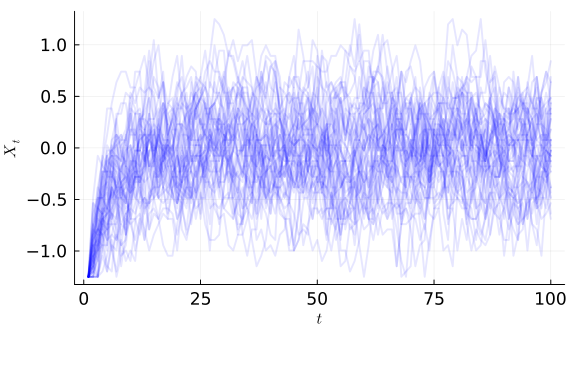

In [15]:
T = 100
num_chains = 50
plt = plot(;ylabel=L"X_t", xlabel=L"t",
           size=(600, 400), legend=false)
for i in 1:num_chains
    X = simulate(mc, T;init=1)
    plot!(X; alpha = 0.1, color=:blue)
end
plt

# Lake Model of Unemployment and Employment

## Individual Worker

-   Consider a worker who can be either employed ($E$) or unemployed
    ($U$), following our previous markov chain
-   Assign the value of $0$ if unemployed and $1$ if employed
-   Lets calculate the cumulative proportion of their time employed

## Reminder on Long-Run

-   What is the probability in the distant future of being employed?
-   Note ergodic interpretation!

In [16]:
lambda = 0.283
alpha = 0.013
T = 5000
# order U, E
P = [1-lambda lambda; alpha 1-alpha]
mc = MarkovChain(P)
@show stationary_distributions(mc)[1]
eigvals, eigvecs = eigen(P')
index = findfirst(x -> isapprox(x, 1), eigvals)
pi_star = real.(vec(eigvecs[:, index]))
pi_star = pi_star / sum(pi_star)
@show pi_star;

(stationary_distributions(mc))[1] = [0.043918918918918914, 0.956081081081081]
pi_star = [0.04391891891891895, 0.9560810810810811]

## Cumulative Employment


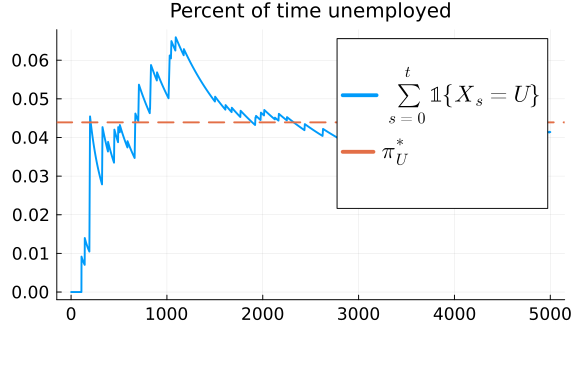

In [17]:
mc = MarkovChain(P, [0; 1])  # U -> 0, E -> 1
s_path = simulate(mc, T; init = 2)
u_bar, e_bar = stationary_distributions(mc)[1]
# Note mapping in MarkovChain
s_bar_e = cumsum(s_path) ./ (1:T)
s_bar_u = 1 .- s_bar_e
s_bars = [s_bar_u s_bar_e]
plot(title = "Percent of time unemployed",
 1:T, s_bars[:, 1], lw = 2,
 label=L"\sum_{s=0}^t \mathbb{1}\{X_s = U\}",
 legend=:topright, size=(600, 400))
hline!([u_bar], linestyle = :dash,
       label = L"\pi^{*}_U")

## Many Workers

-   Consider if an entire economy is populated by workers of these types
-   With approximately a continuum of agents of this type, can we
    interpret the statistical distribution of the states as a fraction
    in the distribution?
-   This is a key trick used throughout macro, but is subtle
-   We will assume a continuum of agents, but add in:
    -   A proportion $d$ die each period
    -   A proportion $b$ are born each period (into the $U$ state)
    -   Define $g\equiv b-d$, the net growth rate

## Definitions

-   To track distributions, a tight connection to the “adjoint” of the
    stochastic process for the Markov Chain

-   Instead, building it directly from flows, define

    -   $E_t$, the total number of employed workers at date $t$
    -   $U_t$, the total number of unemployed workers at $t$
    -   $N_t$, the number of workers in the labor force at $t$
    -   The employment rate $e_t \equiv E_t/N_t$.
    -   The unemployment rate $u_t \equiv U_t/N_t$.

## Laws of Motion for Stock Variables

-   Of the mass of workers $E_t$ who are employed at date $t$,

    -   $(1-d)E_t$ remain in $N_t$, and $(1-\alpha)(1-d)E_t$ remain in
        $E_t$

    $$
    E_{t+1} = (1-d)(1-\alpha)E_t + (1-d)\lambda U_t
    $$

-   Of the mass of workers $U_t$ workers who are currently unemployed,

    -   $(1-d)U_t$ will remain in $N_t$ and $(1-d) \lambda U_t$ enter
        $E_t$

    $$
    U_{t+1} = (1-d)\alpha E_t + (1-d)(1-\lambda)U_t + b (E_t+U_t)
    $$

-   The total stock of workers $N_t=E_t+U_t$ evolves as

    $$
    N_{t+1} = (1+b-d)N_t = (1+g)N_t
    $$

## Summarizing

-   Letting $X_t \equiv \begin{bmatrix}U_t\\E_t\end{bmatrix}$, the law
    of motion for $X$ is

    $$
    X_{t+1} = \underbrace{\begin{bmatrix}
        (1-d)(1-\lambda) + b & (1-d)\alpha + b  \\
        (1-d)\lambda & (1-d)(1-\alpha)
    \end{bmatrix}}_{\equiv A} X_t
    $$

    -   Note:
        $A = (1-d) P^{\top} + \begin{bmatrix}b & b\\0 & 0\end{bmatrix}$
    -   Take a class in stochastic processes!

## Laws of Motion for Rates

-   Define
    $x_t \equiv \begin{bmatrix}u_t\\e_t\end{bmatrix} = \begin{bmatrix}U_t/N_t\\E_t/N_t\end{bmatrix}$

-   Divide both sides of $X_{t+1} = A X_t$ by $N_{t+1}$ and simplify to
    get $$
      x_{t+1} = \underbrace{\frac{1}{1 + g} A}_{\equiv \hat{A}} x_t
      $$

    -   You can check that $e_t + u_t = 1$ implies that
        $e_{t+1}+u_{t+1} = 1$

## Longrun Distribution

-   To find the long-run distribution of employment rates note, $$
    x^{*} = \hat{A} x^{*} = h(x^{*})
    $$
    -   So could ,find a fixed point of $h(\cdot)$
    -   Or solve an eigenvalue problem.
-   Note that if $g \neq 0$, there is no fixed point of
    $X_{t+1} = A X_t$

## Reminder: Simple Function Iteration

In [18]:
function iterate_map(f, x0, T)
    x = zeros(length(x0), T + 1)
    x[:, 1] = x0
    for t in 2:(T + 1)
        x[:, t] = f(x[:, t - 1])
    end
    return x
end

## Implementation of a Lake Model

In [19]:
function LakeModel(; lambda = 0.283, alpha = 0.013, b = 0.0124, d = 0.00822)
    g = b - d
    A = [(1 - lambda) * (1 - d)+b (1 - d) * alpha+b
         (1 - d)*lambda (1 - d)*(1 - alpha)]
    A_hat = A ./ (1 + g)
    x_0 = ones(size(A_hat, 1)) / size(A_hat, 1)
    sol = fixedpoint(x -> A_hat * x, x_0)
    converged(sol) || error("Failed to converge in $(sol.iterations) iter")    
    x_bar =sol.zero
    return (; lambda, alpha, b, d, A, A_hat, x_bar)
end

## Aggregate Dynamics


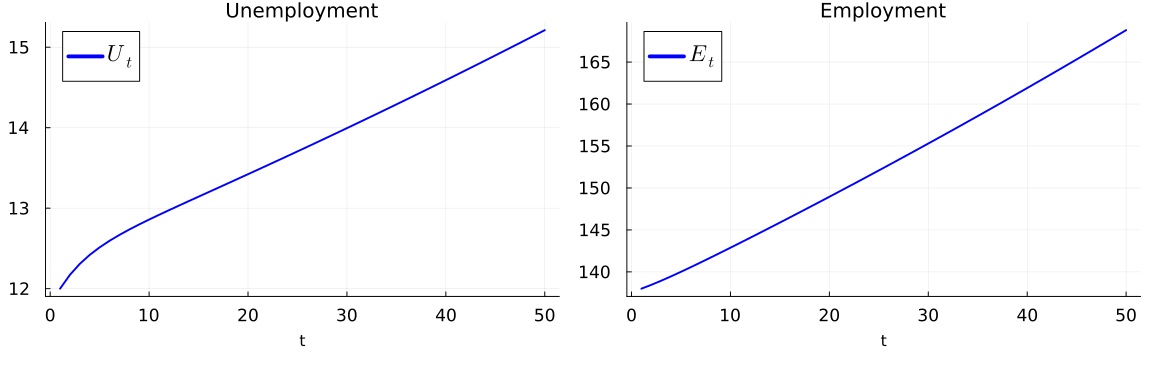

In [20]:
lm = LakeModel()
N_0 = 150
e_0 = 0.92
u_0 = 1 - e_0
T = 50
U_0 = u_0 * N_0
E_0 = e_0 * N_0
X_0 = [U_0; E_0]
X_path = iterate_map(X -> lm.A * X, X_0, T - 1)
x1 = X_path[1, :]
x2 = X_path[2, :]
plt_unemp = plot(1:T, X_path[1, :]; color = :blue,
                 label = L"U_t", xlabel="t", title = "Unemployment")
plt_emp = plot(1:T, X_path[2, :]; color = :blue,
               label = L"E_t", xlabel="t", title = "Employment")
plot(plt_unemp, plt_emp, layout = (1, 2), size = (1200, 400))

## Transitions of Rates


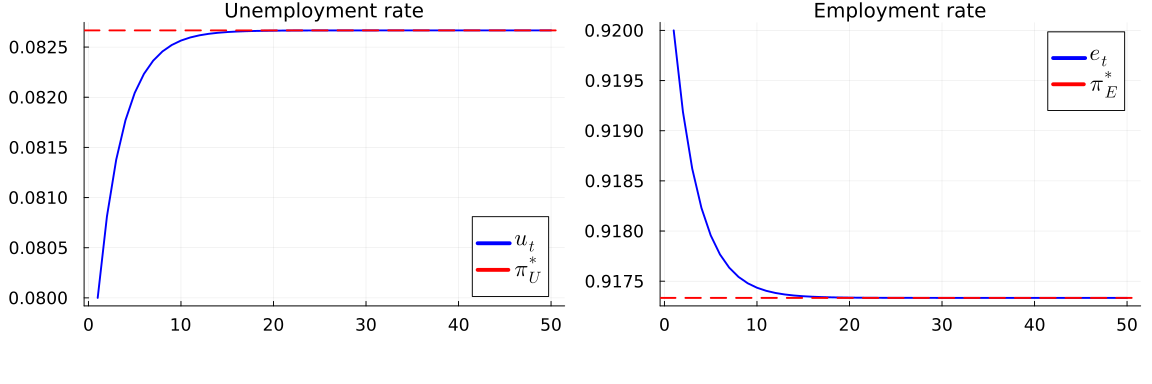

In [21]:
u_bar, e_bar = lm.x_bar
x_0 = [u_0; e_0]
x_path = iterate_map(x -> lm.A_hat * x, x_0, T - 1)
plt_unemp = plot(1:T, x_path[1, :];title = "Unemployment rate", 
                 color = :blue, label = L"u_t")
hline!(plt_unemp, [u_bar], color = :red, linestyle = :dash, label = L"\pi^{*}_U")
plt_emp = plot(1:T, x_path[2, :]; title = "Employment rate", color = :blue, label = L"e_t")
hline!(plt_emp, [e_bar], color = :red, linestyle = :dash,label = L"\pi^{*}_E")
plot(plt_unemp, plt_emp, layout = (1, 2), size = (1200, 400))